In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from etc import PlanExposure

In [2]:
# Specify parameters in an input parameter file
filename = "prototype_params.txt"

To just use estimated average values for parameters stored in the parameter file, set integrate to False. This is equivalent to using the Excel spreadsheet.

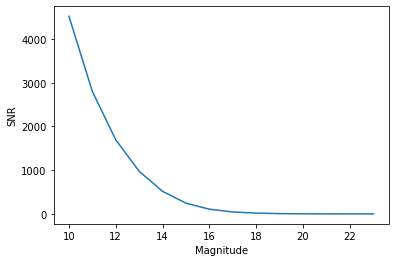

In [3]:
plan = PlanExposure(paramfile=filename,integrate=False)

magrange=np.arange(10,24) #The ETC assumes AB magnitudes are provided

# Plot SNR vs magnitude at the predefined exposure time in the parameter file
srcrate, snr = plan.plot_snr(magrange)
plt.gca()
plt.yscale('linear')

In [4]:
print('Frame time: {} s'.format(plan.frame_time))
print('Coadds: {}'.format(plan.coadds))
print('Total integration time: {:.1f} min'.format(plan.exptime/60))
print('Sky Rate: {:.1f} e/s/pix'.format(plan.calc_sky_noise()))

df = pd.DataFrame({'AB_Magnitude': magrange,'~VegMag': magrange-1.85, 'Src count rate (e/s)': srcrate, 'SNR': snr})
df['Src count rate (e/s)'] = df['Src count rate (e/s)'].round(1)
df['SNR'] = df['SNR'].round(1)
df

Frame time: 2.0 s
Coadds: 512.0
Total integration time: 17.1 min
Sky Rate: 337.8 e/s/pix


,AB_Magnitude,~VegMag,Src count rate (e/s),SNR
0,10,8.15,20438.6,4519.9
1,11,9.15,8136.8,2801.7
2,12,10.15,3239.3,1695.1
3,13,11.15,1289.6,975.4
4,14,12.15,513.4,516.0
5,15,13.15,204.4,246.4
6,16,14.15,81.4,108.0
7,17,15.15,32.4,44.9
8,18,16.15,12.9,18.2
9,19,17.15,5.1,7.3


Otherwise, use the data files to integrate over expected sky transmission, sky brightness, H2RG QE, and filter transmission curves. This mode also includes noise from the thermal self emission from the first corrector lens (the window).   

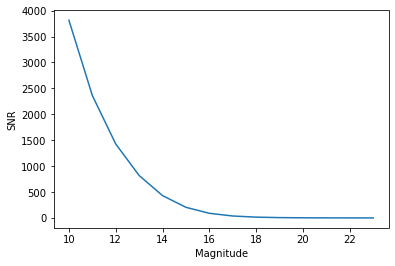

In [5]:
plan = PlanExposure(paramfile=filename,integrate=True)
srcrate, snr = plan.plot_snr(magrange)
plt.gca()
plt.yscale('linear')

In [6]:
print('Frame time: {} s'.format(plan.frame_time))
print('Coadds: {}'.format(plan.coadds))
print('Total integration time: {:.1f} min'.format(plan.exptime/60))
print('Sky Rate: {:.1f} e/s/pix'.format(plan.calc_sky_noise()))

df = pd.DataFrame({'AB_Magnitude': magrange,'~VegMag': magrange-1.85, 'Src count rate (e/s)': srcrate, 'SNR': snr})
df['Src count rate (e/s)'] = df['Src count rate (e/s)'].round(1)
df['SNR'] = df['SNR'].round(1)
df

Frame time: 2.0 s
Coadds: 512.0
Total integration time: 17.1 min
Sky Rate: 209.7 e/s/pix


,AB_Magnitude,~VegMag,Src count rate (e/s),SNR
0,10,8.15,14580.0,3815.2
1,11,9.15,5804.4,2362.9
2,12,10.15,2310.8,1426.8
3,13,11.15,919.9,818.1
4,14,12.15,366.2,430.5
5,15,13.15,145.8,204.5
6,16,14.15,58.0,89.3
7,17,15.15,23.1,37.1
8,18,16.15,9.2,15.0
9,19,17.15,3.7,6.0


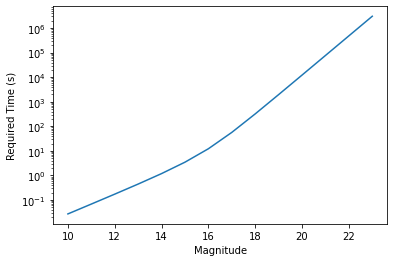

In [7]:
# Plot exposure time needed to reach a given SNR 
times = plan.plot_exptime(magrange,snr_desired=10)

You can also specify parameters directly in this notebook.

In [8]:
#Telescope properties/detector characteristics
coadds = 1800
frame_time = 2 #[s]
avg_skyBrightness = 1.20E-04 #K-dark Dome C estimate, [Jy arcsec^-2] (relevant only if skyBrightness_file not defined)
focal_length = 0.525 #[m]
read_noise = 15 #[e]
dark_current = 50 #[e/s]
pixel_size = 1.80E-05 #[m]
beam_obstruction = 8.0E-3 #[m^2] (Area of detector housing + spider vanes in the FOV)
avg_qe = 0.9 #(relevant only if qeData not defined)
aperture_diameter = 0.26 #[m]

#Throughputs
avg_skyTransmission = 0.95 #(relevant only if skyTransmission_file not defined)
avg_filterTransmission = 0.98 #(relevant only if filterTransmission_file not defined )
transmission_loss = 0.005 #Transmission loss per surface
num_tlosses = 4 #Number of transmission losses
reflection_loss = 0.04 # Loss per reflection
num_rlosses = 1 #Number of reflections

#K-dark observing
central_wavelength = 2.38e-06 #[m] (relevant only if filterTransmission_file not defined)
passband = 2.26e-07 #[m] (relevant only if filterTransmission_file not defined)
ambientTemp = -80 #Window temperature [C]

#Relevant parameters for integrating over spectral profiles (rather than using an estimate for an average value)
skyBrightness_file = 'data_files/ashley_sky.csv' #Sky brightness spectrum
skyTransmission_file = 'data_files/ashley_skytrans.csv' #Sky transmission spectrum
qe_file = 'data_files/H2RG_qedata.csv' #QE spectrum
filterTransmission_file = 'data_files/Asahi_Kdark.csv' #Filter transmission spectrum

parameters = np.array([coadds,frame_time,avg_skyBrightness,focal_length,read_noise,
                       dark_current,pixel_size,beam_obstruction,avg_qe,aperture_diameter,avg_skyTransmission,
                       avg_filterTransmission,transmission_loss,num_tlosses,reflection_loss,num_rlosses,
                       central_wavelength,passband,ambientTemp,skyBrightness_file,skyTransmission_file,
                       qe_file,filterTransmission_file])

In [9]:
plan = PlanExposure(param_arr=parameters,integrate=True)

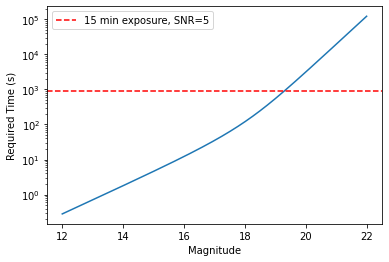

In [10]:
# Plot exposure time needed to reach a given SNR 
times = plan.plot_exptime(np.linspace(12,22,10000),snr_desired=5)
plt.axhline(15*60, label='15 min exposure, SNR=5',ls='--',color='r')
plt.legend()
plt.show()

For full scale system, 

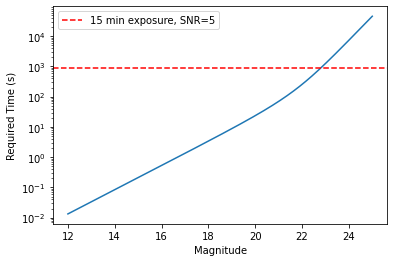

In [11]:
plan = PlanExposure(paramfile='fullscale_params.txt',integrate=True)
times = plan.plot_exptime(np.linspace(12,25,10000),snr_desired=5)
plt.axhline(15*60, label='15 min exposure, SNR=5',ls='--',color='r')
plt.legend()
plt.show()